<a href="https://colab.research.google.com/github/Ali-mohammadi-design/Prompt_Engineering_and_Machine_Learning/blob/main/Prompt_engineering_AWS_Bedrock_Recipe_creator_image_generator_Titan_text_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this training we wout give the ingredients that we have in home as a prompt to LLM and ask it to propose a food as well as its recipe. Then it would also generate its image for us.

In [1]:
! pip install boto3
import boto3
s3=boto3.resource('s3')
s3.buckets.all()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.0 MB/s eta 0:00:00


s3.bucketsCollection(s3.ServiceResource(), s3.Bucket)

In [4]:
import os
aws_access_key_id=os.environ['aws_access_key_id']
aws_secret_access_key=os.environ['aws_secret_access_key']

In [5]:

s3 = boto3.resource('s3',
         aws_access_key_id=aws_access_key_id,
         aws_secret_access_key= aws_secret_access_key)

In [6]:
bedrock_runtime= boto3.client(aws_access_key_id=aws_access_key_id,aws_secret_access_key= aws_secret_access_key, service_name='bedrock-runtime', region_name='us-east-1')


In [258]:
ingredient='eggs, apple, onion, water, meat, bread, orange, tomato paste, rice, honey, chese, oil, chicken, fish, lamb'

In [259]:
prompt=f'please consider the following ingredients and suggets only one food to be cooked with all or some of them. Then describe its recipe. \n\n This is the ingredients:\n {ingredient}'

In [260]:
import json
body=json.dumps({'inputText':prompt,'textGenerationConfig':{'temperature':0.7 , 'maxTokenCount':500}})

In [261]:
response=bedrock_runtime.invoke_model(body=body, modelId='amazon.titan-text-express-v1')

In [262]:
answer=response.get('body').read()
response_body=json.loads(answer)
food=response_body['results'][0]['outputText']
print(food)


Here is the recipe:
Omelet:

Ingredients:
- Eggs
- Your choice of meat (e.g., ham, bacon, sausage, or chicken)
- Your choice of vegetables (e.g., bell peppers, onions, spinach, or mushrooms)
- Salt and pepper to taste
- Butter or oil for cooking

Instructions:
1. Crack and beat the eggs in a bowl.
2. Heat a non-stick pan over medium heat and add a small amount of butter or oil.
3. Add the meat and vegetables to the pan and cook until they are cooked to your liking.
4. Add the beaten eggs to the pan and let them cook until they are set but still fluffy.
5. Flip the omelet over and cook for another minute or two.
6. Slide the omelet onto a plate and serve.

You can customize your omelet by adding different spices, cheese, or herbs to the eggs. You can also add additional vegetables or meat to the pan to create a larger omelet.


In [263]:
prompt_summerized=f'please summerize the following text: \n {food}. \n Please only reteun the name of the food and then bring out its short recipe without extra explaination'

In [264]:
body_summerized=json.dumps({'prompt':prompt_summerized, 'max_gen_len':300, 'temperature':1, 'top_p':1  })

In [267]:
response_summerized=bedrock_runtime.invoke_model(body=body_summerized, modelId='meta.llama2-13b-chat-v1')

In [268]:
answer=response_summerized.get('body').read()
response_body_summerized=json.loads(answer)
food_summerized=response_body_summerized['generation']
print(food_summerized)

.

sure! Here is the summary of the text you provided:

Name of food: Omelet
Short Recipe:
- Crack and beat eggs in a bowl
- Heat a non-stick pan with butter or oil
- Add meat and veggies and cook until done
- Add eggs and cook until set
- Flip and cook for another minute
- Slide onto a plate and serve


In [269]:
pos_prompt=f"Please consider the following food and its recipe and return the image of the dish. The food is :\n\n{food_summerized} "

In [270]:
parameters= {
    "taskType": "TEXT_IMAGE",
    "textToImageParams": { "text": pos_prompt },
    "imageGenerationConfig": {
        "numberOfImages": 1,
        "quality": "premium",
        "height": 512,
        "width": 512,
        "seed": 0
    }
}

In [271]:
import json

In [272]:
request=json.dumps(parameters)

In [273]:
response=bedrock_runtime.invoke_model(body=request, modelId='amazon.titan-image-generator-v1')

In [274]:
answer=response.get('body').read()
response_body=json.loads(answer)

In [275]:
import PIL
import base64
from PIL import Image

In [276]:
base_64_image=base64.b64decode(response_body['images'][0])

In [277]:
file_path='food.png'

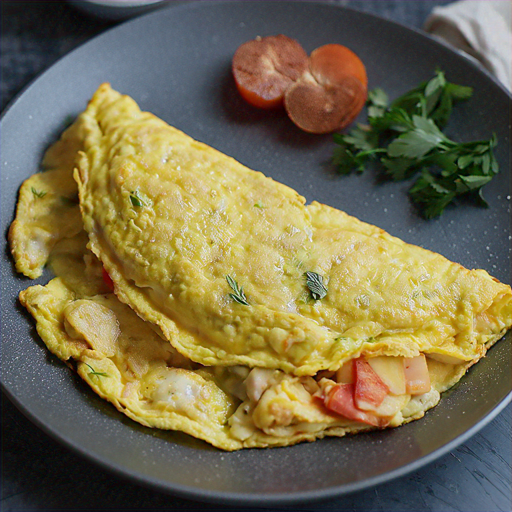

In [278]:
with open(file_path,'wb') as file:
  file.write(base_64_image)
Image.open(file_path)